# Algorithm Study - Week 1
### (7.27 ~ 8.2)

## 1. The Role of Algorithms of Computing

### An algorithm is thus a sequence of computational steps that transform the input into the output.
<br>

- **P / NP / NP-Hard / NP-Complete**  

    1. P 문제 : 정렬 문제와 같이 결정론적 튜링 머신으로 쉽게 풀어낼 수 있는 문제들을 말한다.  
    <br>
    2. NP 문제 : 비 결정론적 튜링머신으로 다항시간 내에 풀어낼 수 있는, 즉, 시간이 오래 걸리는 문제들을 말한다.  
    <br>
    3. NP-완전(Complete) 문제 : 모든 NP문제들을 어떤 문제 A로 환원(reduction)할 수 있고 환원한 문제를 해결할 수 있다면, A는 NP-완전 문제(NP-complete)라 하고, 정확히 말하면 NP-난해 문제이자 NP-완전문제이다.  
    <br>
    4. NP-난해(NP-Hard) 문제 : 환원한 문제를 해결할 수 없다면 이를 NP-난해(NP-hard)라고 한다.  
    <br>  
> 알고리즘 문제들의 분류 내용으로 보인다. 자세한 내용은 링크 확인 (https://wkdtjsgur100.github.io/P-NP/ or https://www.wikiwand.com/ko/%EA%B3%84%EC%82%B0_%EB%B3%B5%EC%9E%A1%EB%8F%84_%EC%9D%B4%EB%A1%A0)



# 2. Getting Started

### 2-1. Insert sort 

- 삽입 정렬은 두 번째 자료부터 시작하여 그 앞(왼쪽)의 자료들과 비교하여 삽입할 위치를 지정한 후 자료를 뒤로 옮기고 지정한 자리에 자료를 삽입하여 정렬하는 알고리즘이다.
- 첫 Key 값은 두 번째 자료부터 시작한다.
>참고 링크 : https://gmlwjd9405.github.io/2018/05/06/algorithm-insertion-sort.html


### Insert sort 시간 복잡도

- 최선의 경우
    - 비교 횟수
        - 이동 없이 1번의 비교만 이루어진다. <br>
        - 외부 루프: (n-1)번 <br>
    - Best T(n) = O(n)
            
- 최악의 경우(입력 자료가 역순일 경우)
    - 비교 횟수
        - 외부 루프 안의 각 반복마다 i번의 비교 수행<br>
        - 외부 루프: (n-1) + (n-2) + … + 2 + 1 = n(n-1)/2 = O(n^2)<br>
    - 교환 횟수
        - 외부 루프의 각 단계마다 (i+2)번의 이동 발생<br>
        - n(n-1)/2 + 2(n-1) = (n^2+3n-4)/2 = O(n^2)<br>
    - Worst T(n) = O(n^2)

In [16]:
# Sample Code

arr1 = [5, 2, 4, 6, 1, 3]
arr2 = [10, 9, 12, 17, 15]

def insert_sort(arr):
    for j in range(1, len(arr)):
        key = arr[j]
        i = j-1
        
        while (i >= 0) and (arr[i] > key):
            arr[i+1] = arr[i]
            i = i-1
            arr[i+1] = key
        
    return arr

In [18]:
print(insert_sort(arr1))
print(insert_sort(arr2))

[1, 2, 3, 4, 5, 6]
[9, 10, 12, 15, 17]


### 2-2. Divide and Conquer Algorithm (분할정복법)

- 해결하고자 하는 문제(Problem)를 통째로 놓고 푸는 것이 아니고 문제를 작은 크기의 동일한 문제들(Problems)로 분할해서 각각의 작은 문제를 순환적으로 해결하는 방법을 말한다. 퀵정렬이나 합병정렬과 같은 정렬 알고리즘이나 이진탐색 등이 그 예시이며 빅데이터를 분석 할 때  하나의 머신(Machine)에서  많은 데이터를 분석하지 않고 데이터를 쪼개서 여러 머신에서 처리하도록 한 다음(병렬처리) 그 결과를 합쳐( Merge) 최종적으로 리포팅하여 시간을 절약하는 방법도  일종의 분할 정복이라고 볼수 있다.  
<br>
- 동적프로그래밍과 유사한 부분이 있지만, 분할정복 알고리즘은 문제해결을 위해 하위문제를 분할하고 하위문제의 해가 다른 하위문제를 풀기 위해 사용되지 않고 독립적인 것에 반해 동적프로그래밍은 하위문제의 해가 다른 하위 문제를 푸는데 필요하다.  
<br>
- 분할정복은 보통 세 단계로 진행된다.
    - ⓐ 분할(divide) 단계 : 해결하고자 하는 문제를 작은 크기의 동일한 문제들로 분할
    - ⓑ 정복(conquer) 단계 : 각각의 작은 문제를 동일한 방법으로 순환적(recursive)으로 해결
    - ⓒ 합정(merge) 단계 : 작은 문제의 해를 합하여(merge) 원래 문제에 대한 해를 구함  
<br>
- 장점: 문제를 나눔으로써 어려운 문제를 해결할 수 있다는 엄청나게 중요한 장점이 있다. 그리고 이 방식이 그대로 사용되는 효율적인 알고리즘들도 여럿 있으며, 문제를 나누어 해결한다는 특징상 병렬적으로 문제를 해결하는 데 큰 강점이 있다.  
<br>
- 단점: 함수를 재귀적으로 호출한다는 점에서 함수 호출로 인한 오버헤드가 발생하며, 스택에 다양한 데이터를 보관하고 있어야 하므로 스택 오버플로우가 발생하거나 과도한 메모리 사용을 하게 되는 단점

>참고 링크 : https://jackpot53.tistory.com/68 / https://kimch3617.tistory.com/entry/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EB%B6%84%ED%95%A0%EC%A0%95%EB%B3%B5%EB%B2%95-Divide-and-Conquer

### 2-2-1. Merge sort (합병 정렬)

- 분할 정복 알고리즘의 한 종류로, 하나의 리스트를 두 개의 균등한 크기로 분할하고 분할된 부분 리스트를 정렬한 다음, 두 개의 정렬된 부분 리스트를 합하여 전체가 정렬된 리스트가 되게 하는 방법이다.

> 참고 링크 : https://gmlwjd9405.github.io/2018/05/08/algorithm-merge-sort.html

### Merge sort 시간 복잡도

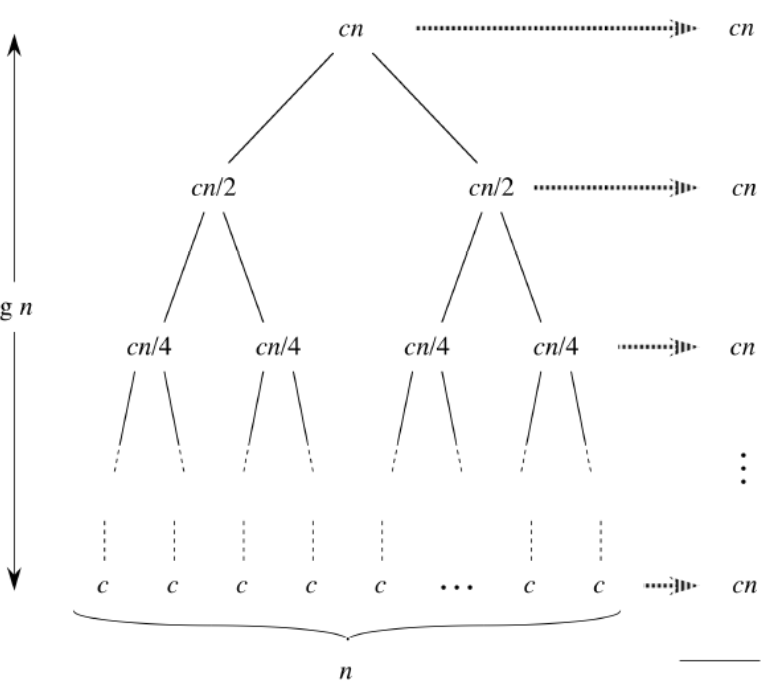

- **O(NlogN)**
- 가령 3개로 쪼갤 경우 전체 층의 수는 log(3)n이 되는데, 이는 로그의 성질에 의해 log(2)3 × log(2)n과 같다. 첫째 항은 상수이므로 매 층마다 3개씩 쪼개도 합병정렬의 계산복잡성은 O(nlogn)로 동일하다.

> 참고 링크 : https://pro-programmer.tistory.com/entry/kway-Merge-Sort%ED%95%A9%EB%B3%91-%EC%A0%95%EB%A0%AC%EC%9D%98-%EC%8B%9C%EA%B0%84%EB%B3%B5%EC%9E%A1%EB%8F%84-%EA%B3%84%EC%82%B0%ED%95%98%EA%B8%B0  or <br> https://gmlwjd9405.github.io/2018/05/08/algorithm-merge-sort.html <- 두 링크만으로 쉽게 이해 가능

In [50]:
# Sample Code

arr3 = [5, 2, 4, 7, 1, 3, 2, 6]
arr4 = [21, 10, 12, 20, 25, 13, 15, 22, 17]

# my trial

def my_merge(arr):
    if len(arr) <= 1:
        return arr

    key = len(arr) // 2
    low_arr = my_merge(arr[:key]) # 재귀 함수 사용
    high_arr = my_merge(arr[key:])

    merged_arr = []
    l = h = 0
    
    while l < len(low_arr) and h < len(high_arr):
        if low_arr[l] < high_arr[h]:
            merged_arr.append(low_arr[l])
            l += 1
        else:
            merged_arr.append(high_arr[h])
            h += 1
            
    merged_arr += low_arr[l:] # 마지막 두 숫자 추가, 개수 넘어가는 범위는 포함이 안됨.
    merged_arr += high_arr[h:]
    return merged_arr


# Other solution

def merge(left, right):
    result = []
    while len(left) > 0 or len(right) > 0:
        if len(left) > 0 and len(right) > 0:
            if left[0] <= right[0]:
                result.append(left[0])
                left = left[1:]
            else:
                result.append(right[0])
                right = right[1:]
        elif len(left) > 0:
            result.append(left[0])
            left = left[1:]
        elif len(right) > 0:
            result.append(right[0])
            right = right[1:]
    return result

def merge_sort(list):
    if len(list) <= 1:
        return list
    mid = len(list) // 2
    leftList = list[:mid]
    rightList = list[mid:]
    leftList = merge_sort(leftList)
    rightList = merge_sort(rightList)
    return merge(leftList, rightList)

In [51]:
print(my_merge(arr3))
print(my_merge(arr4))

print(merge_sort(arr3))
print(merge_sort(arr4))

[1, 2, 2, 3, 4, 5, 6, 7]
[10, 12, 13, 15, 17, 20, 21, 22, 25]
[1, 2, 2, 3, 4, 5, 6, 7]
[10, 12, 13, 15, 17, 20, 21, 22, 25]


## 프로그래머스 코딩 연습 - 정렬

> K 번째 수

In [73]:
# 프로그래머스 - 정렬 - K번째 수 [insert_sort 사용]

input1 = [1, 5, 2, 6, 3, 7, 4]
commands1 = [[2, 5, 3], [4, 4, 1], [1, 7, 3]]

def insert_solution(array, commands):
    answer = []
    
    for c in commands:
        start, end = c[0]-1, c[1]
        arr = array[start:end]
        for i in range(1, len(arr)):
            key = arr[i]
            j = i-1
            while (j >= 0) and (arr[j] > key):
                arr[j+1] = arr[j]
                j = j-1
                arr[j+1] = key
        
        answer.append(arr[c[2]-1])
    return answer

print(insert_solution(input1, commands1))

[5, 6, 3]


In [74]:
# other's solution :(

def sample_solution(array, commands):
    return list(map(lambda x:sorted(array[x[0]-1:x[1]])[x[2]-1], commands))

sample_solution(input1, commands1)

[5, 6, 3]

> 가장 큰 수

In [72]:
# my trial - Fail...

input2 = [3, 30, 34, 5, 9]

def solution(numbers):
    start = {}
    
    for n in sorted(numbers):
        length = len(str(n))
        if n // 10**(length-1) not in start:
            start[n // 10**(length-1)] = [n]
        elif n // 10**(length-1) in start:
            start[n // 10**(length-1)].append(n)
            
    return start
solution(input2)

{3: [3, 30, 34], 5: [5], 9: [9]}

In [75]:
# other's solution...

def solution(numbers):
    numbers = list(map(str, numbers))
    numbers.sort(key = lambda x: x*3, reverse=True)
    return str(int(''.join(numbers)))

solution(input2)

'9534330'

In [76]:
import functools

def comparator(a,b):
    t1 = a+b
    t2 = b+a
    return (int(t1) > int(t2)) - (int(t1) < int(t2)) #  t1이 크다면 1  // t2가 크다면 -1  //  같으면 0

def solution(numbers):
    n = [str(x) for x in numbers]
    n = sorted(n, key=functools.cmp_to_key(comparator),reverse=True)
    answer = str(int(''.join(n)))
    return answer

solution(input2)

'9534330'

### [참고]

- Analyzing Algorithms  
https://bigdatadiary0819.tistory.com/78

- 이후 3장 빠르게 보고 넘어간 뒤, 4장 제대로 하는게 좋을 것 같음